# Project Overview 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


## EDA 

- Which genres are most popular from year to year? 
- What genres of movie is most popular?
- What production company produces the most movies?
- What movie has the highest revenue? 

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from datetime import datetime



In [2]:
# Import the data
movie_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# Initial Inspection of Data 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

__Conclusion from data__
Some data is missing from: homepage, overview, release_date, runtime and tagline. However, these will not dilute the analysis result as there are only a few data values missing. 

In [4]:
#  View data in columns: Understand the data
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
# Explore the genre column

movie_df.genres.head(20)

0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5     [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6     [{"id": 16, "name": "Animation"}, {"id": 10751...
7     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8     [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
10    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
11    [{"id": 12, "name": "Adventure"}, {"id": 28, "...
12    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
13    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
14    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
15    [{"id": 12, "name": "Adventure"}, {"id": 10751...
16    [{"id": 878, "name": "Science Fiction"}, {"id"...
17    [{"id": 12, "name": "Adventure"}, {"id": 2

__Genre column is a little difficult to read and analyse. Parsing data to get on the genres.__

In [6]:
# Parse genre column
def parse_col_json(column,key):

    for index,i in zip(movie_df.index,movie_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movie_df.loc[index,column]=str(list1)

In [7]:
parse_col_json('genres', 'name')


movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [15]:
# Genre categories 
movie_df.genres.sort_values().unique()

array(["['Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Romance']",
       "['Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Science Fiction']",
       "['Action', 'Adventure', 'Animation', 'Comedy', 'Family']", ...,
       "['Western', 'History']", "['Western']", '[]'], dtype=object)

In [18]:
# highest genres count
movie_df.genres.value_counts()

['Drama']                                      370
['Comedy']                                     282
['Drama', 'Romance']                           164
['Comedy', 'Romance']                          144
['Comedy', 'Drama']                            142
                                              ... 
['Documentary', 'Foreign']                       1
['Adventure', 'Drama', 'Music', 'Romance']       1
['Drama', 'History', 'Crime']                    1
['War', 'History', 'Drama']                      1
['Thriller', 'Fantasy', 'Action', 'Comedy']      1
Name: genres, Length: 1175, dtype: int64

In [20]:
# Top 10 genres of movies 
movie_df.genres.value_counts().head(10)

['Drama']                         370
['Comedy']                        282
['Drama', 'Romance']              164
['Comedy', 'Romance']             144
['Comedy', 'Drama']               142
['Comedy', 'Drama', 'Romance']    109
['Horror', 'Thriller']             88
['Documentary']                    68
['Horror']                         64
['Drama', 'Thriller']              62
Name: genres, dtype: int64

In [24]:
movie_genres10 = movie_df.genres.value_counts().head(10)

<AxesSubplot:>

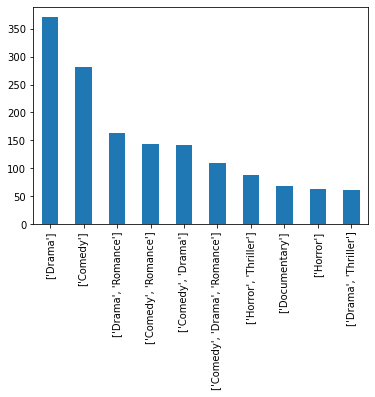

In [25]:
movie_genres10.plot.bar()

In [26]:
# Highest earning: Revenue - budget 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [29]:
#Part 1: highest revenue movies top 5

movie_df.revenue.sort_values(ascending = False).head(5)

0     2787965087
25    1845034188
16    1519557910
28    1513528810
44    1506249360
Name: revenue, dtype: int64

In [30]:
#Part 2: Highest budget movies top 5
movie_df.budget.sort_values(ascending = False).head(5)

17    380000000
1     300000000
7     280000000
10    270000000
4     260000000
Name: budget, dtype: int64

__Conclusion__

- Just because a movie has the higest revenue or highest budget does not mean it is the most profitable movie.


In [48]:
# Calculate profit 
movie_df["profit"] = movie_df["revenue"]- movie_df["budget"]
profit_top_5 = movie_df.sort_values(by='profit',ascending=False)
profit_top_5.profit.head(5)

0     2550965087
25    1645034188
28    1363528810
44    1316249360
16    1299557910
Name: profit, dtype: int64